# Evaluation examples

In [66]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
%autoreload 2
simulation = Simulator(n_nodes = 25, n_edges = 35, n_clusters = 5, seed = 12343, sample_size = 100)
cluster_dag = simulation.run()

2023-07-28 11:51:28,993 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [68]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1'], 'C2': ['X4', 'X15', 'X6'], 'C3': ['X7', 'X11', 'X12', 'X19', 'X23', 'X2', 'X5', 'X16', 'X18', 'X8', 'X9', 'X10'], 'C4': ['X20', 'X21', 'X24', 'X25'], 'C5': ['X13', 'X14', 'X17', 'X3', 'X22']}
[('C1', 'C3'), ('C2', 'C3'), ('C3', 'C5'), ('C2', 'C5'), ('C3', 'C4'), ('C2', 'C4'), ('C4', 'C5')]


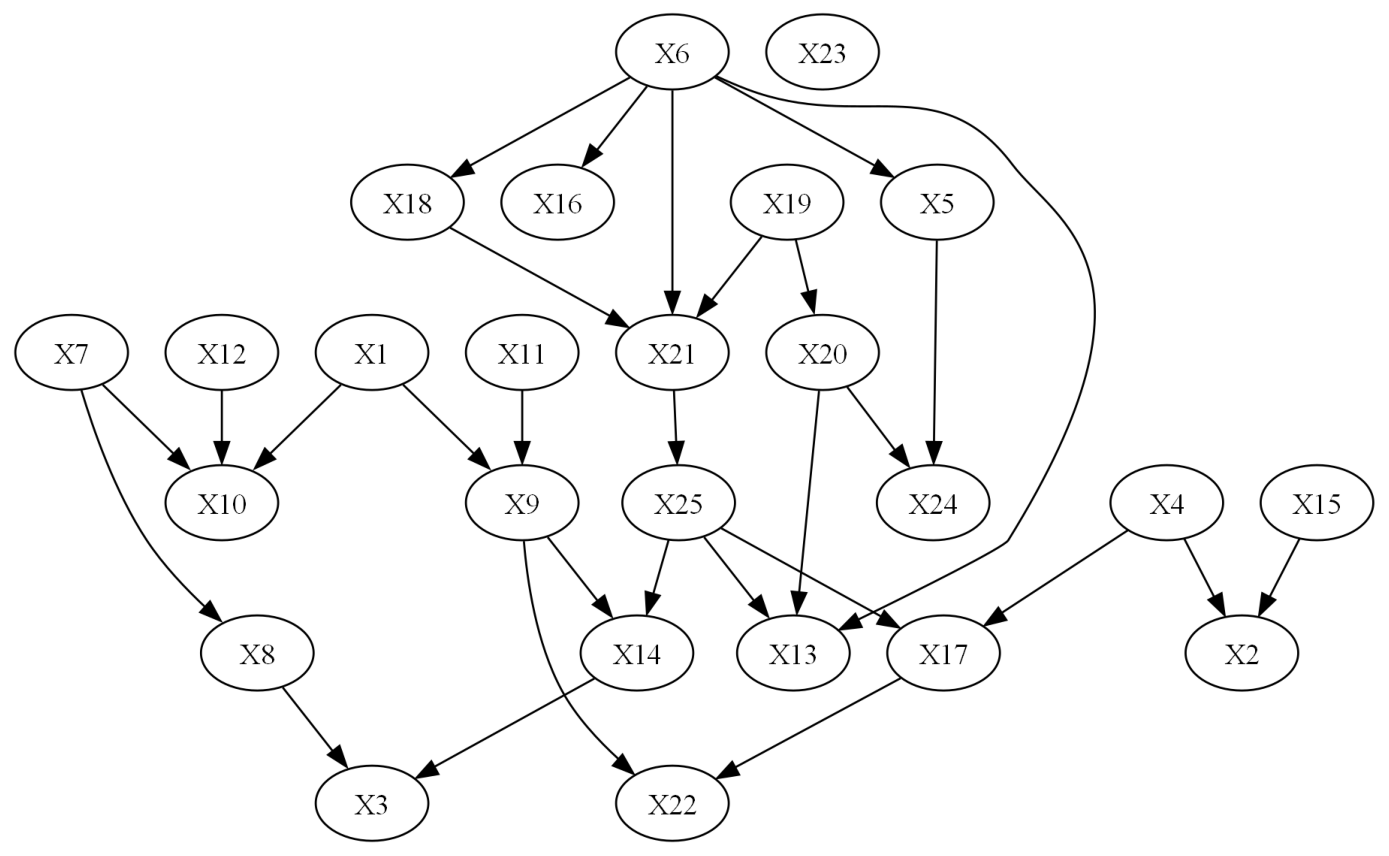

In [69]:
cluster_dag.true_dag.draw_pydot_graph()

In [70]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [71]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

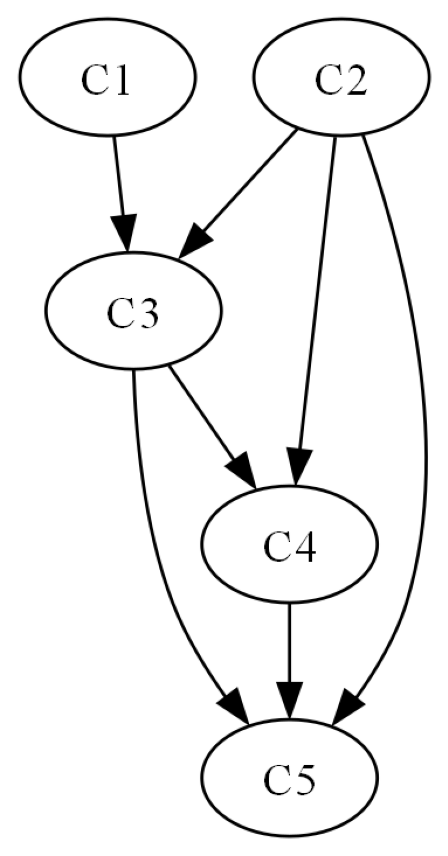

In [72]:
cluster_dag.draw_cluster_graph()

In [73]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

In:     C5, Depth=0, working on node 21: 100%|██████████| 5/5 [00:00<00:00, 263.31it/s, duration: 0.12sec]


Duration of algorithm was 1.48sec


In [74]:
print(cluster_dag.cluster_mapping.keys())

dict_keys(['C1', 'C2', 'C3', 'C4', 'C5'])


In [75]:
# print(cluster_dag.cluster_mapping['C2'])
# print(cluster_dag.cluster_mapping['C4'])

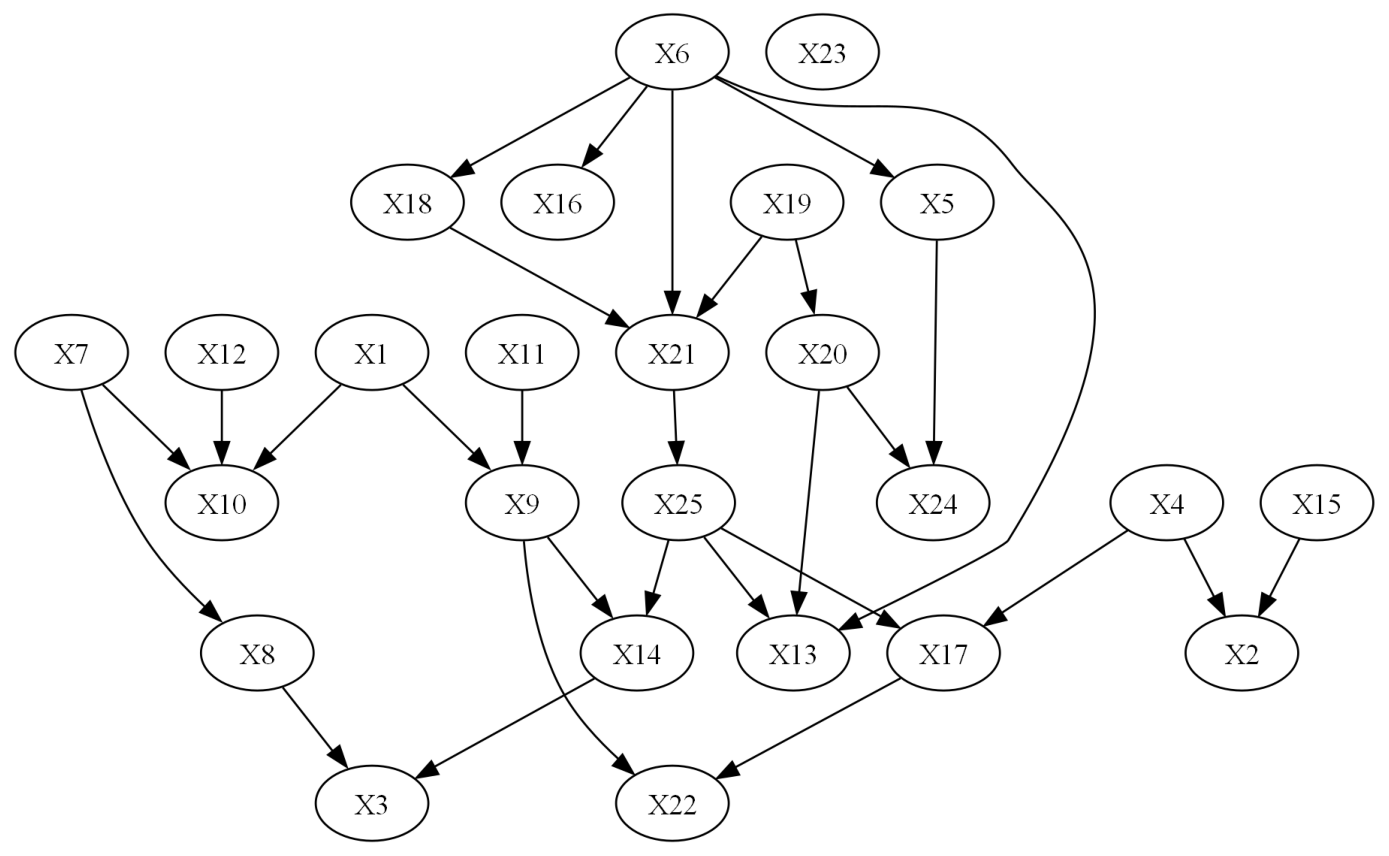

In [76]:
cluster_dag.true_dag.draw_pydot_graph()

In [77]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

In [78]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

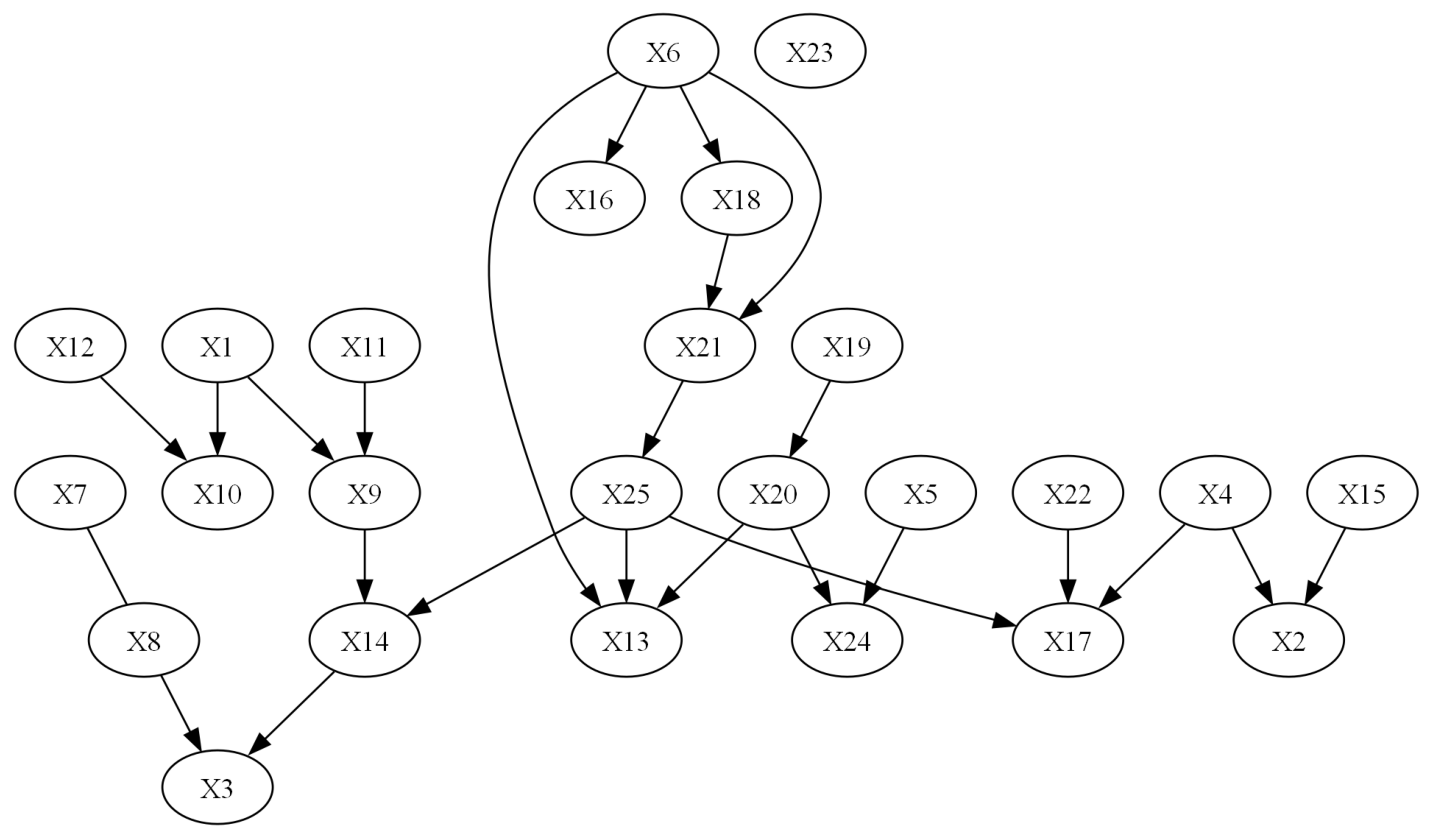

In [79]:
est_graph.draw_pydot_graph()

In [80]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 25, 'false_positive': 0, 'false_negative': 4, 'true_negative': 271, 'precision': 1.0, 'recall': 0.8620689655172413}
Arrow confusion:  {'true_positive': 23.0, 'false_positive': 1.0, 'false_negative': 6.0, 'true_negative': 595.0, 'precision': 0.9583333333333334, 'recall': 0.7931034482758621, 'true_positive_ce': 23.0, 'false_positive_ce': 1.0, 'false_negative_ce': 2.0, 'true_negative_ce': 599.0, 'precision_ce': 0.9583333333333334, 'recall_ce': 0.92}
SHD:  5


In [83]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.05, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)

Depth=2, working on node 24: 100%|██████████| 25/25 [00:00<00:00, 758.00it/s] 


Max depth: 2
Adjacency confusion:  {'true_positive': 21, 'false_positive': 0, 'false_negative': 8, 'true_negative': 271, 'precision': 1.0, 'recall': 0.7241379310344828}
Arrow confusion:  {'true_positive': 13.0, 'false_positive': 3.0, 'false_negative': 16.0, 'true_negative': 593.0, 'precision': 0.8125, 'recall': 0.4482758620689655, 'true_positive_ce': 13.0, 'false_positive_ce': 3.0, 'false_negative_ce': 8.0, 'true_negative_ce': 601.0, 'precision_ce': 0.8125, 'recall_ce': 0.6190476190476191}
SHD:  11


In [ ]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

False
False
False


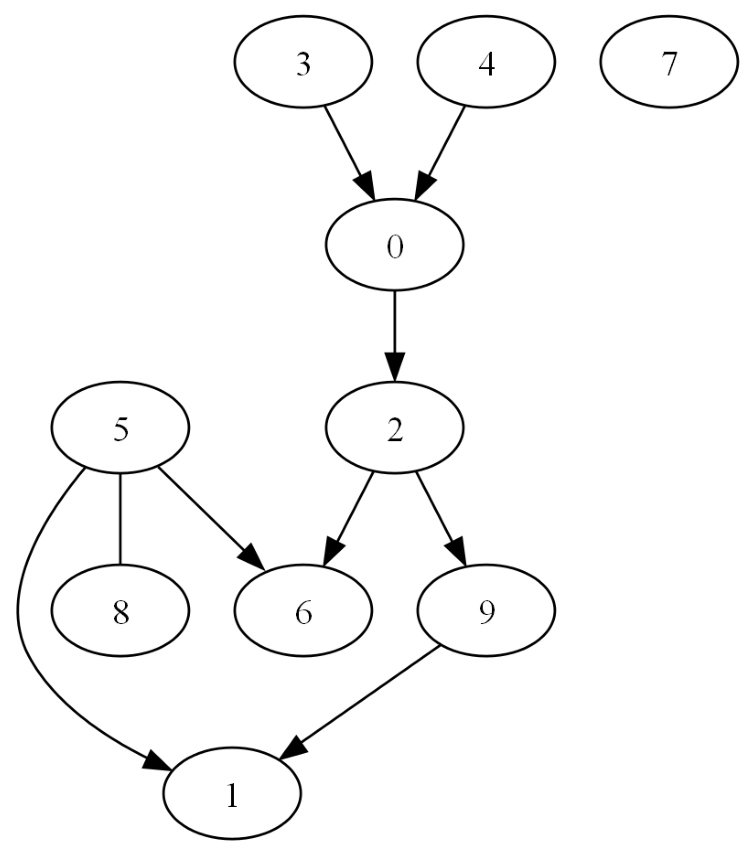

In [ ]:
causallearn_cg.draw_pydot_graph()

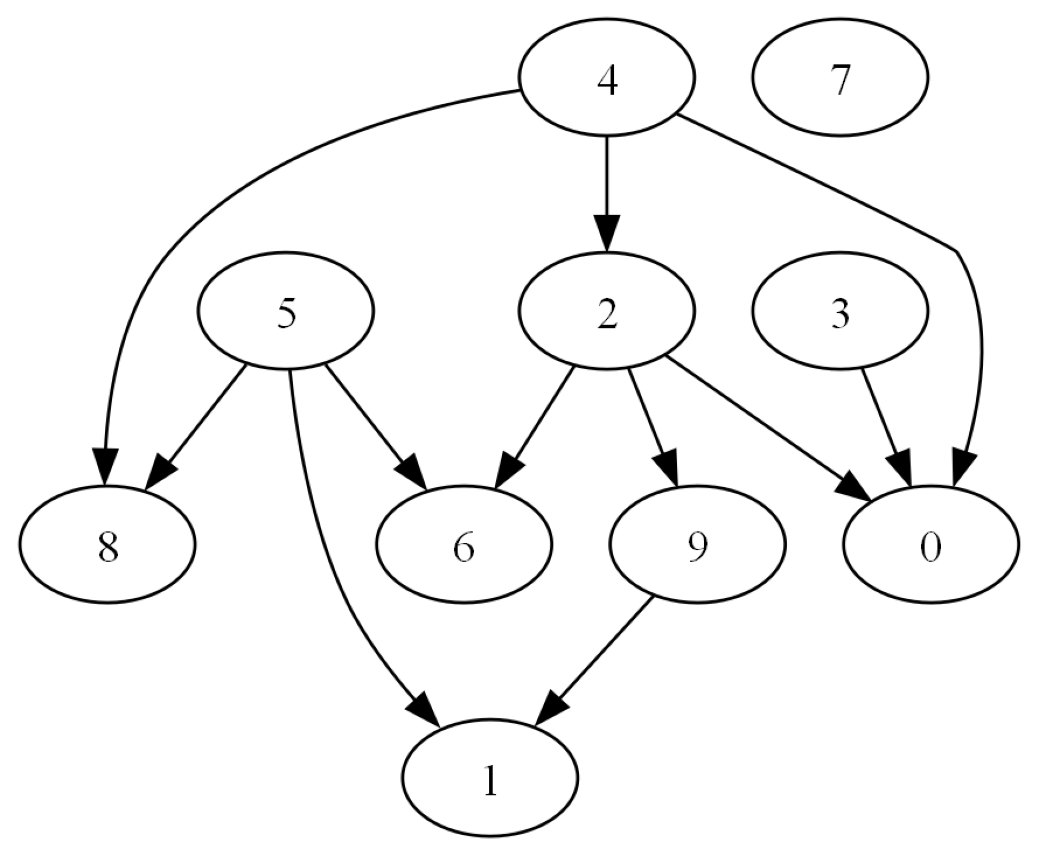

In [ ]:
est_graph.draw_pydot_graph()

In [ ]:
cluster_dag.cg.to_nx_graph()
causallearn_cg.to_nx_graph()

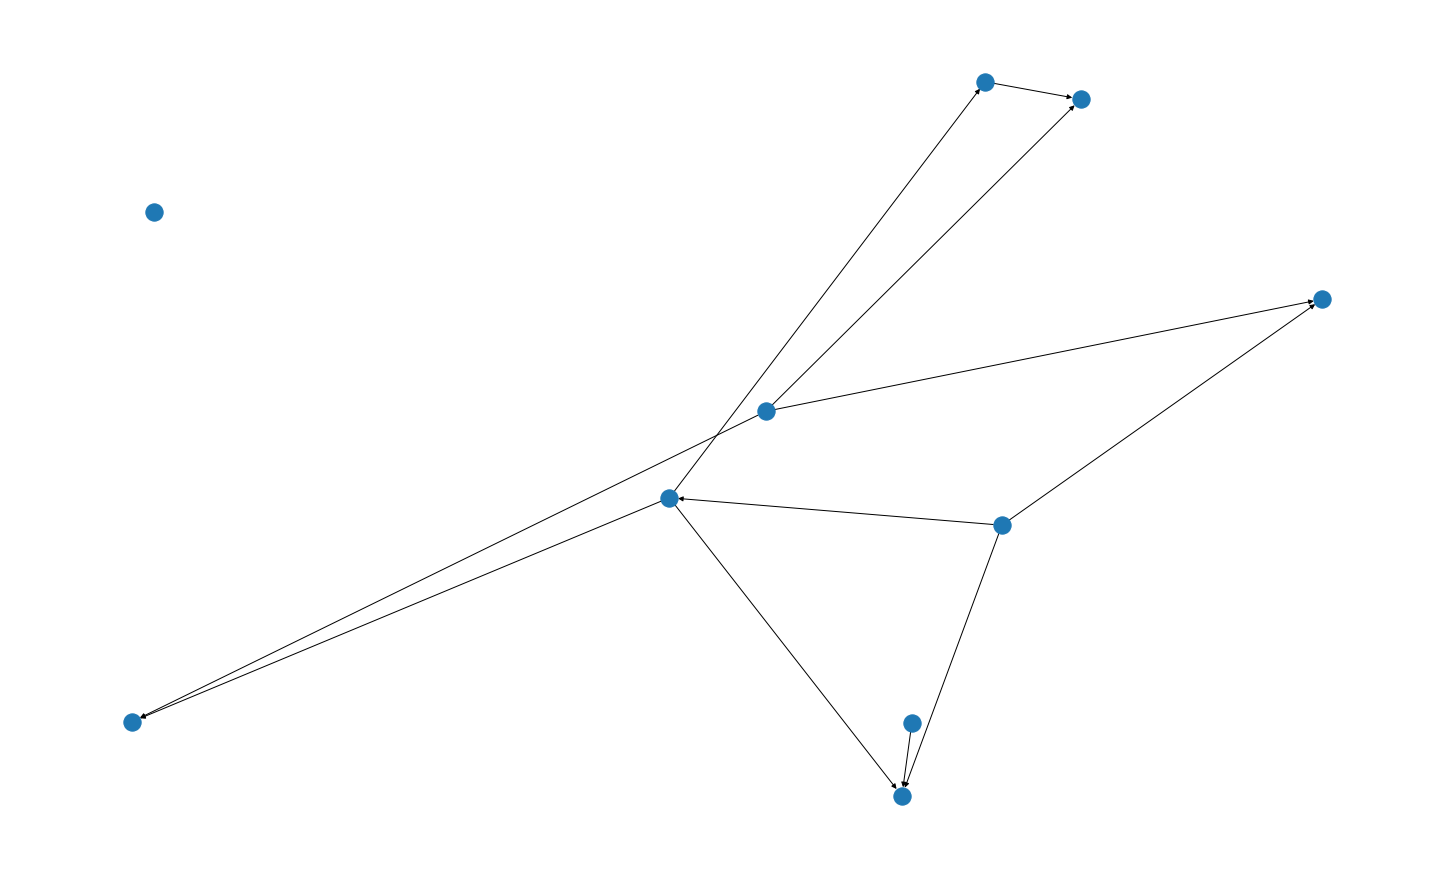

In [ ]:
import networkx as nx
nx.draw(cluster_dag.cg.nx_graph)